In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
df = pd.read_csv('natural-gas-consumption-by-zip-code-2010.csv')

In [3]:
df.head()

Zip Code      Building type  Consumption (therms)  Consumption (GJ)  \
0     10300         Commercial                 470.0              50.0   
1     10335         Commercial                 647.0              68.0   
2     10360  Large Residential               33762.0            3562.0   
3     11200         Commercial               32125.0            3389.0   
4     11200      Institutional                3605.0             380.0   

          Source  Longitude  Latitude  
0  National Grid        NaN       NaN  
1  National Grid        NaN       NaN  
2  National Grid        NaN       NaN  
3  National Grid        NaN       NaN  
4  National Grid        NaN       NaN

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Zip Code              1015 non-null   int64  
 1   Building type         1015 non-null   object 
 2   Consumption (therms)  1005 non-null   float64
 3   Consumption (GJ)      1005 non-null   float64
 4   Source                1015 non-null   object 
 5   Longitude             964 non-null    float64
 6   Latitude              964 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 55.6+ KB


In [5]:
def fillColumnByAnother(data,source_col,dest_col):
    """Fills a missing value from a feature based on average of another feature"""
    dict_from_source = dict()
    keys = data[source_col].unique().tolist()
    for k in keys:
        dict_from_source[k] = data[data[source_col] == k][dest_col].mean()
        data.loc[(data[source_col] == k) & (data[dest_col].isna()),dest_col] = dict_from_source.get(k)
    print(data.info())

In [6]:
fillColumnByAnother(df,'Building type','Consumption (therms)')
fillColumnByAnother(df,'Building type','Consumption (GJ)')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Zip Code              1015 non-null   int64  
 1   Building type         1015 non-null   object 
 2   Consumption (therms)  1015 non-null   float64
 3   Consumption (GJ)      1005 non-null   float64
 4   Source                1015 non-null   object 
 5   Longitude             964 non-null    float64
 6   Latitude              964 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 55.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Zip Code              1015 non-null   int64  
 1   Building type         1015 non-null   object 
 2   Consumption (therms)  1015 non-null   float64
 3   C

In [7]:
df.isna().sum()

Zip Code                 0
Building type            0
Consumption (therms)     0
Consumption (GJ)         0
Source                   0
Longitude               51
Latitude                51
dtype: int64

In [8]:
cont_cols = df.describe().columns.tolist()
df_copy = df[cont_cols]
cont_cols

['Zip Code',
 'Consumption (therms)',
 'Consumption (GJ)',
 'Longitude',
 'Latitude']

In [9]:
df.corr()

Zip Code  Consumption (therms)  Consumption (GJ)  \
Zip Code              1.000000              0.028498          0.028498   
Consumption (therms)  0.028498              1.000000          1.000000   
Consumption (GJ)      0.028498              1.000000          1.000000   
Longitude            -0.372297             -0.138655         -0.138655   
Latitude              0.568882             -0.094580         -0.094580   

                      Longitude  Latitude  
Zip Code              -0.372297  0.568882  
Consumption (therms)  -0.138655 -0.094580  
Consumption (GJ)      -0.138655 -0.094580  
Longitude              1.000000  0.345145  
Latitude               0.345145  1.000000

In [10]:
coor_dfs = pd.read_csv('US Zip Codes from 2013 Government Data.csv')
coor_dfs.head()
coor_dfs_wip = coor_dfs.copy()

In [11]:
coor_dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33144 entries, 0 to 33143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZIP     33144 non-null  int64  
 1   LAT     33144 non-null  float64
 2   LNG     33144 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 776.9 KB


In [12]:
missing_zips = df[(df['Longitude'].isna()) & (df['Latitude'].isna())]['Zip Code'].tolist()
coor_dfs.set_index('ZIP',inplace=True)
zip_dict = dict()
for z in missing_zips:
    zip_dict[z] = coor_dfs.iloc[z]['LAT'], coor_dfs.iloc[z]['LNG']
    
for zkey in zip_dict.keys():
    df.loc[df['Zip Code'] == zkey,'Latitude'] = zip_dict[zkey][0]
    df.loc[df['Zip Code'] == zkey,'Longitude'] = zip_dict[zkey][1]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Zip Code              1015 non-null   int64  
 1   Building type         1015 non-null   object 
 2   Consumption (therms)  1015 non-null   float64
 3   Consumption (GJ)      1015 non-null   float64
 4   Source                1015 non-null   object 
 5   Longitude             1015 non-null   float64
 6   Latitude              1015 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 55.6+ KB


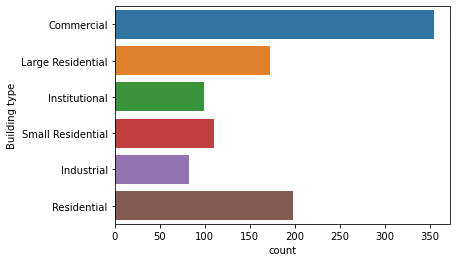

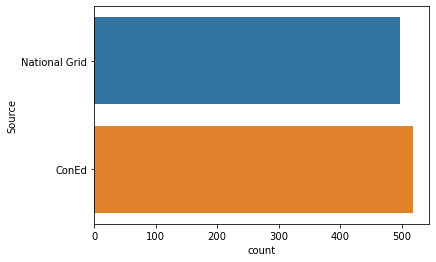

In [14]:
CAT_COLS = df.describe(include='O').columns.tolist()
for col in CAT_COLS:
    sns.countplot(y=df[col])
    plt.show()

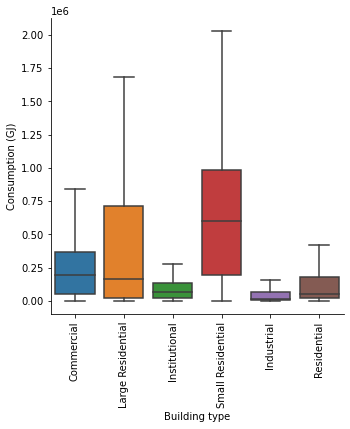

In [15]:
sns.catplot(x='Building type',y='Consumption (GJ)',data=df,kind='box',sym='')
plt.xticks(rotation=90)
plt.show()

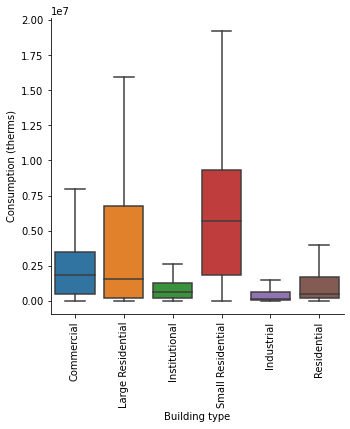

In [16]:
g = sns.catplot(x='Building type',y='Consumption (therms)',data=df,kind='box',sym='')
plt.xticks(rotation=90)
plt.show()

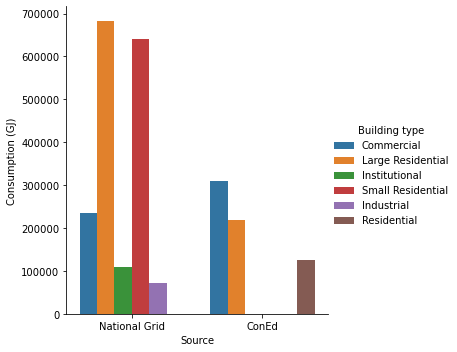

In [17]:
sns.catplot(x='Source',y='Consumption (GJ)',data=df,kind='bar',hue='Building type',ci=None)
plt.show()

In [18]:
us_map = folium.Map(location=[37.0902, -95.7129],zoom_start=4,tiles='Stamen Terrain')
us_map

In [19]:
btypes = df['Building type'].unique().tolist()
btypes_colors = ['blue','orange','red','yellow','green','purple']

dict_colors = {btypes[i]:btypes_colors[i] for i in range(len(btypes))}

In [20]:
locations = folium.map.FeatureGroup()
for lat,long,lab in zip(df['Latitude'],df['Longitude'],df['Building type']):
    locations.add_child(folium.features.CircleMarker([lat,long],radius=5,color=dict_colors[lab],\
                                                     fill=True,fill_color=dict_colors[lab],fill_opacity=0.6))
    
    locations.add_child(folium.Marker([lat,long],popup=lab,icon=folium.Icon(color=dict_colors[lab])))
us_map.add_child(locations)

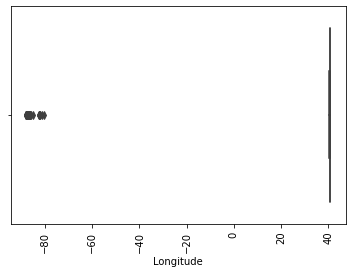

In [21]:
sns.boxplot(x='Longitude',data=df)
plt.xticks(rotation=90)
plt.show()

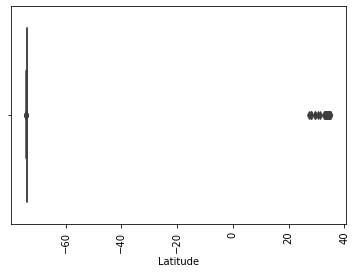

In [22]:
sns.boxplot(x='Latitude',data=df)
plt.xticks(rotation=90)
plt.show()

In [23]:
center_location = [df[df['Latitude']>20]['Latitude'].mean(),df[df['Longitude']<30]['Longitude'].mean()]
center_location

[33.131280705882354, -86.42114731372547]

In [24]:
center_map = folium.Map(location = center_location, zoom_start=6, tiles = 'Stamen Terrain')
center_map

In [25]:
center_map.add_child(locations)